In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

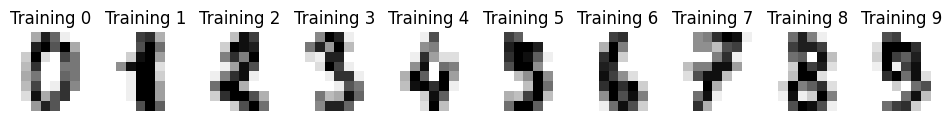

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(12,3))

for ax, image, label in zip(axs, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training {label}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegression()

knn.fit(scaled_X_train, Y_train)
log.fit(scaled_X_train, Y_train)

Y_knn = knn.predict(scaled_X_test)
Y_log = log.predict(scaled_X_test)

print(classification_report(Y_test, Y_knn))
print(classification_report(Y_test, Y_log))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.92      0.99      0.95        98
           2       0.99      0.95      0.97        84
           3       0.98      0.96      0.97        89
           4       1.00      0.97      0.98        87
           5       0.98      0.93      0.96        91
           6       0.98      1.00      0.99       107
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.93        90
           9       0.91      0.94      0.92        78

    accuracy                           0.96       899
   macro avg       0.97      0.96      0.96       899
weighted avg       0.97      0.96      0.96       899

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       0.91      0.96      0.94        98
           2       0.95      1.00      0.98        84
           3       1.00 

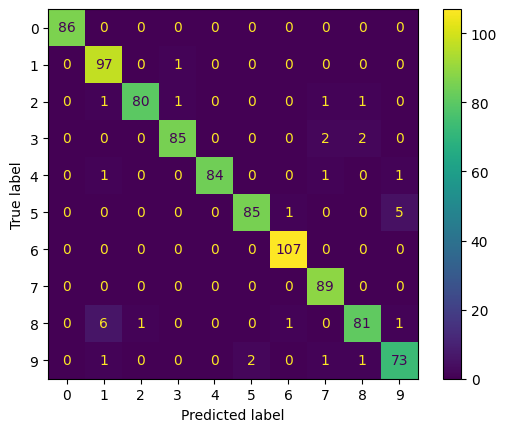

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_knn)

ConfusionMatrixDisplay(cm).plot()

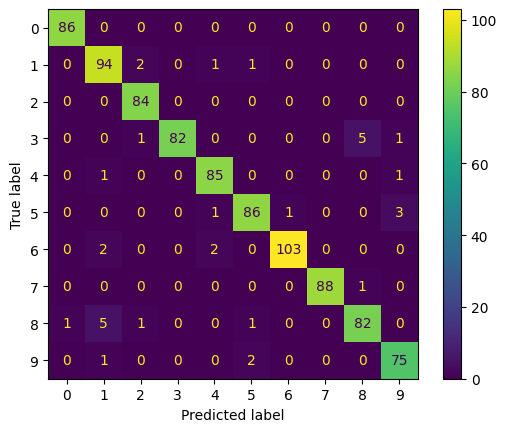

In [ ]:
cm = confusion_matrix(Y_test, Y_log)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

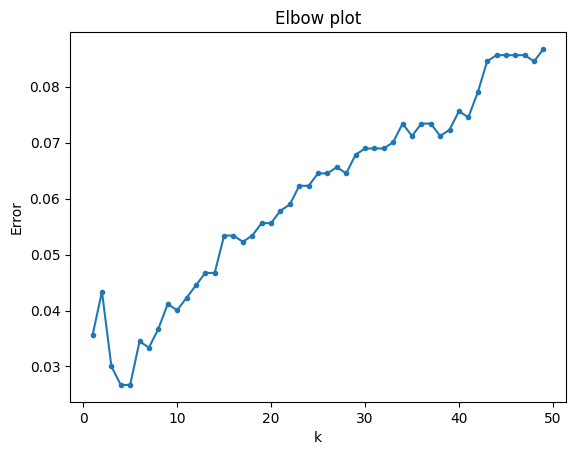

In [ ]:
from sklearn.metrics import accuracy_score

error = 1-accuracy_score(Y_test, Y_knn)
error_list = []

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list += [1-accuracy_score(Y_test, Y_hat)]

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbow plot", xlabel="k", ylabel="Error")
    
